In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [ ]:
# !pip install keras

In [ ]:
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, BatchNormalization, Flatten, Dropout
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/googleplaystore_user_reviews.csv')
print(df.columns)
df.head()

Index(['App', 'Translated_Review', 'Sentiment'], dtype='object')


,App,Translated_Review,Sentiment
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive
2,10 Best Foods for You,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive
4,10 Best Foods for You,Best idea us,Positive


In [ ]:
df.drop("App",axis=1,inplace=True)

In [ ]:
df.rename(columns={'Translated_Review':'review','Sentiment':'sentiment'},inplace=True)

In [ ]:
df.head()

,review,sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
2,NaN,NaN
3,Works great especially going grocery store,Positive
4,Best idea us,Positive


In [ ]:
df.isna().sum()

,0
review,26868
sentiment,26863


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     37427 non-null  object
 1   sentiment  37432 non-null  object
dtypes: object(2)
memory usage: 1004.7+ KB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37427 entries, 0 to 64230
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     37427 non-null  object
 1   sentiment  37427 non-null  object
dtypes: object(2)
memory usage: 877.2+ KB


<Axes: xlabel='sentiment'>

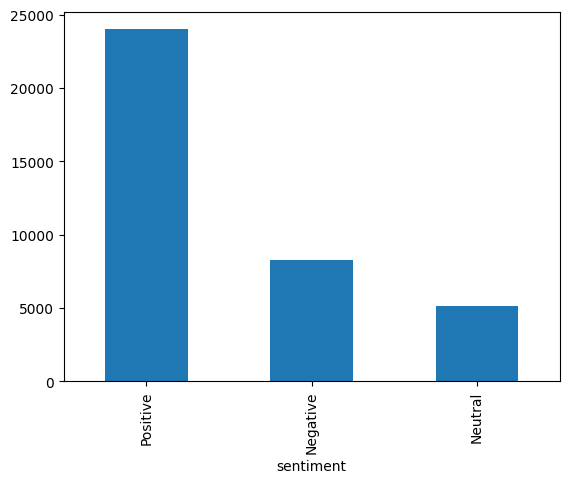

In [ ]:
df['sentiment'].value_counts().plot(kind='bar')

In [ ]:
def preprocessing_pipeline(text):
  lemmatizer = WordNetLemmatizer()
  if str(text) != "<class 'str' >" :
    text = list(text)
    corpus =[]
    for i in range(len(text)):
      review = re.sub("[^a-zA-Z]"," ",str(text[i]))
      review = review.lower()
      review = review.split()
      r = [word for word in review if word not in stopwords.words("english")]
      r = [lemmatizer.lemmatize(word) for word in r]
      r = ' '.join(r)
      corpus.append(r)
    return corpus
  else:
    review = review = re.sub("[^a-zA-Z]"," ",str(text[i]))
    review = review.lower()
    review = review.split()
    r = [word for word in review if word not in stopwords.words("english")]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
  return r

In [ ]:
preprocessed_text = preprocessing_pipeline(df['review'])

In [ ]:
preprocessed_text

['like eat delicious food cooking food case best food help lot also best shelf life',
 'help eating healthy exercise regular basis',
 'work great especially going grocery store',
 'best idea u',
 'best way',
 'amazing',
 'looking forward app',
 'helpful site help food get',
 'good',
 'useful information amount spelling error question validity information shared fixed star given',
 'thank great app add arthritis eye immunity kidney liver detox food please',
 'greatest ever completely awesome maintain health must ppl love',
 'good health good health first priority',
 'health important world either life think',
 'mr sunita bhati thankful developer make kind app really good healthy food body',
 'useful diabetes age need control sugar thanks',
 'one greatest apps',
 'good nice',
 'healthy really helped',
 'god health',
 'health always top priority mysg',
 'excellent useful',
 'found lot wealth form health',
 'found important',
 'healthy eating',
 'good simply good',
 'test',
 'good',
 'than

In [ ]:
df["review"] = preprocessed_text
df.head()

,review,sentiment
0,like eat delicious food cooking food case best...,Positive
1,help eating healthy exercise regular basis,Positive
3,work great especially going grocery store,Positive
4,best idea u,Positive
5,best way,Positive


In [ ]:
df['sentiment'].replace({'Positive':0,'Neutral':1,'Negative':2},inplace=True)

In [ ]:
df.head()

,review,sentiment
0,like eat delicious food cooking food case best...,0
1,help eating healthy exercise regular basis,0
3,work great especially going grocery store,0
4,best idea u,0
5,best way,0


In [ ]:
X = df['review']
y = df['sentiment']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
for i in (x_train,x_test,y_train,y_test):
  print(i.shape)

(29941,)
(7486,)
(29941,)
(7486,)


In [ ]:
# !pip install gensim

In [ ]:
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api
path = api.load("word2vec-google-news-300")
print(path)

KeyedVectors<vector_size=300, 3000000 keys>


In [ ]:
import numpy as np

In [ ]:
def vectorize(sentence):
  words = sentence.split()
  word_vectors = [path[word] for word in words if word in path]
  if len(word_vectors)==0:
    return np.zeros(300)
  word_vecs = np.array(word_vectors)
  return word_vecs.mean(axis=0)
xtrain_embed_google = np.array([vectorize(sentence) for sentence in x_train])
xtest_embed_google = np.array([vectorize(sentence) for sentence in x_test])

In [ ]:

model = Sequential()
model.add(Dense(64,input_shape=(300,),activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(3,activation="softmax"))
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,371 (87.39 KB)

 Trainable params: 22,147 (86.51 KB)

 Non-trainable params: 224 (896.00 B)

None


In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(xtrain_embed_google,np.array(y_train,dtype="float"),epochs = 20, batch_size = 4, validation_split = 0.2)

Epoch 1/20
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.5967 - loss: 0.9227 - val_accuracy: 0.7352 - val_loss: 0.6202
Epoch 2/20
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.6934 - loss: 0.7124 - val_accuracy: 0.7372 - val_loss: 0.6886
Epoch 3/20
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.7090 - loss: 0.6885 - val_accuracy: 0.7534 - val_loss: 0.6293
Epoch 4/20
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7249 - loss: 0.6606 - val_accuracy: 0.7479 - val_loss: 0.6237
Epoch 5/20
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.7332 - loss: 0.6477 - val_accuracy: 0.7537 - val_loss: 0.6079
Epoch 6/20
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.7387 - loss: 0.6406 - val_accuracy: 0.7522 - val_loss: 0.6357
Epoch 7/20
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.7448 - loss: 0.6331 - val_accuracy: 0.7719 - val_loss: 0.5543
Epoch 8/20
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7505 - loss: 0

In [ ]:
p = model.predict(xtest_embed_google)
p = np.argmax(p, axis=1)
print(p)

234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[0 1 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
d = pd.DataFrame(confusion_matrix(y_test,p),columns=["Positive","Neutral","Negative"],index=["Positive","Neutral","Negative"])
print(d)
print(classification_report(y_test,p))

          Positive  Neutral  Negative
Positive      4603       78       103
Neutral        336      624        89
Negative       883       72       698
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      4784
           1       0.81      0.59      0.68      1049
           2       0.78      0.42      0.55      1653

    accuracy                           0.79      7486
   macro avg       0.79      0.66      0.70      7486
weighted avg       0.79      0.79      0.77      7486



In [ ]:
# Keras embedding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
xtrain = tokenizer.texts_to_sequences(x_train)
xtest = tokenizer.texts_to_sequences(x_test)

In [ ]:
vocab_size = len(tokenizer.word_index)+1  #tokenizer.word_index is a dictionary than maps each unique words to an integer index.
print(vocab_size)

16132


In [ ]:
max_length = 300
xtrain = pad_sequences(xtrain,padding="post",maxlen=max_length)
xtest = pad_sequences(xtest,padding="post",maxlen=max_length)

In [ ]:
print(xtrain.shape)
print(y_train.shape)

(29941, 300)
(29941,)


In [ ]:
# using keras embedding

model = Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=100,input_length=max_length))

# (29941,300) There are 29941 padded sentences each with 300 words tokens.
# "input_dim=vocab_size"  this means numnber of unique tokens in the sententences
# "output_dim=100"  means each word becomes a 100 dimensions vector

model.add(Flatten())
model.add(Dense(64,input_shape=(xtrain.shape[1],),activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(3,activation="sigmoid"))
print(model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(xtrain,y_train,epochs=20,batch_size=4,validation_split=0.2)

Epoch 1/20
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.5591 - loss: 1.0091 - val_accuracy: 0.7300 - val_loss: 0.6096
Epoch 2/20
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - accuracy: 0.7127 - loss: 0.6758 - val_accuracy: 0.7958 - val_loss: 0.5077
Epoch 3/20
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.7684 - loss: 0.5747 - val_accuracy: 0.8486 - val_loss: 0.4423
Epoch 4/20
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.7981 - loss: 0.5143 - val_accuracy: 0.8511 - val_loss: 0.4105
Epoch 5/20
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.8262 - loss: 0.4517 - val_accuracy: 0.7868 - val_loss: 0.6173
Epoch 6/20
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.8383 - loss: 0.4289 - val_accuracy: 0.7946 - val_loss: 0.5118
Epoch 7/20
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.8521 - loss: 0.4051 - val_accuracy: 0.8739 - val_loss: 0.3683
Epoch 8/20
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.8593 - loss: 0

In [ ]:
p = model.predict(xtest_embed_google)
p = np.argmax(p, axis=1)
print(p)

234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
d = pd.DataFrame(confusion_matrix(y_test,p),columns=["Positive","Neutral","Negative"],index=["Positive","Neutral","Negative"])
print(d)
print(classification_report(y_test,p))

          Positive  Neutral  Negative
Positive      4784        0         0
Neutral       1049        0         0
Negative      1653        0         0
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      4784
           1       0.00      0.00      0.00      1049
           2       0.00      0.00      0.00      1653

    accuracy                           0.64      7486
   macro avg       0.21      0.33      0.26      7486
weighted avg       0.41      0.64      0.50      7486



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
doc1 = "I'm so happy 😊"
doc2 = "That's a great idea 👍"

In [ ]:
!pip install emoji

In [ ]:
import emoji
emoji.demojize(doc1)

"I'm so happy :smiling_face_with_smiling_eyes:"